# Ward

This notebook illustrates the hierarchical clustering of graphs by the [Ward method](https://scikit-network.readthedocs.io/en/latest/reference/hierarchy.html), after embedding in a space of low dimension.

In [1]:
from IPython.display import SVG

In [2]:
import numpy as np

In [3]:
from sknetwork.data import karate_club, painters, movie_actor
from sknetwork.embedding import Spectral
from sknetwork.hierarchy import Ward, BiWard, cut_straight, dasgupta_score, tree_sampling_divergence
from sknetwork.visualization import svg_graph, svg_digraph, svg_bigraph, svg_dendrogram

## Graphs

In [4]:
graph = karate_club(metadata=True)
adjacency = graph.adjacency
position = graph.position

**Hierarchy**

In [5]:
ward = Ward()
dendrogram = ward.fit_transform(adjacency)

In [6]:
image = svg_dendrogram(dendrogram)

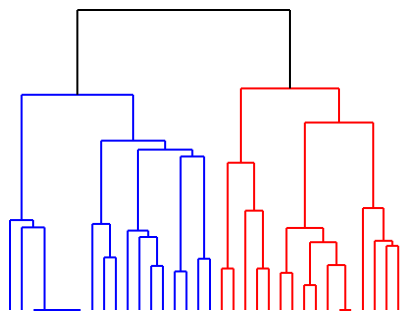

In [7]:
SVG(image)

**Cuts of the dendrogram**

In [8]:
labels = cut_straight(dendrogram)
print(labels)

[1 1 1 1 1 1 1 1 0 0 1 1 1 1 0 0 1 1 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0]


In [9]:
n_clusters = 4
labels, dendrogram_aggregate = cut_straight(dendrogram, n_clusters, return_dendrogram=True)
print(labels)

[1 1 1 1 3 3 3 1 0 0 3 1 1 1 2 2 3 1 2 1 2 1 2 0 0 0 0 0 0 2 2 0 0 0]


In [ ]:
_, counts = np.unique(labels, return_counts=True)

In [16]:
image = svg_dendrogram(dendrogram_aggregate, names=counts, rotate_names=False)

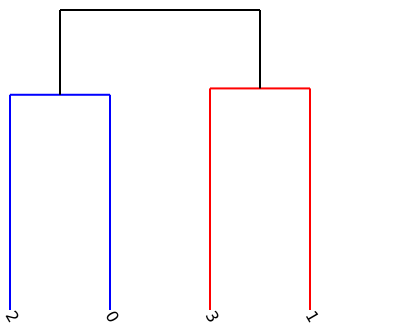

In [17]:
SVG(image)

In [18]:
image = svg_graph(adjacency, position, labels=labels)

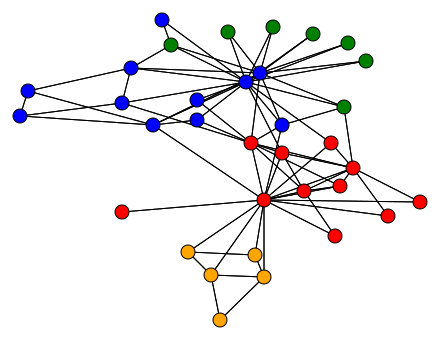

In [19]:
SVG(image)

**Metrics**

In [20]:
dasgupta_score(adjacency, dendrogram)

0.583710407239819

In [21]:
tree_sampling_divergence(adjacency, dendrogram)

0.4342993247923879

**Other embedding**

In [22]:
ward = Ward(embedding_method=Spectral(4))

## Digraphs

In [23]:
graph = painters(metadata=True)
adjacency = graph.adjacency
position = graph.position
names = graph.names

**Hierarchy**

In [24]:
biward = BiWard()
dendrogram = biward.fit_transform(adjacency)

In [25]:
image = svg_dendrogram(dendrogram, names, n_clusters=3, rotate=True)

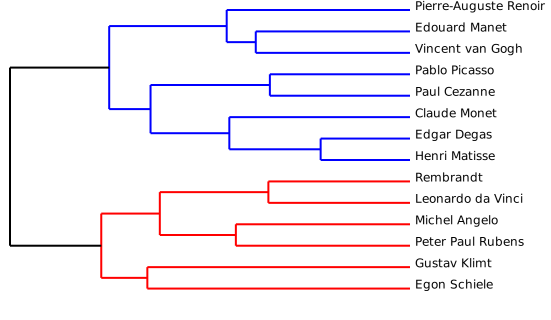

In [26]:
SVG(image)

**Cuts of the dendrogram**

In [27]:
# cut with 3 clusters
labels = cut_straight(dendrogram, n_clusters = 3)
print(labels)

[0 0 1 0 1 1 2 0 0 1 0 0 0 2]


In [28]:
image = svg_digraph(adjacency, position, names=names, labels=labels)

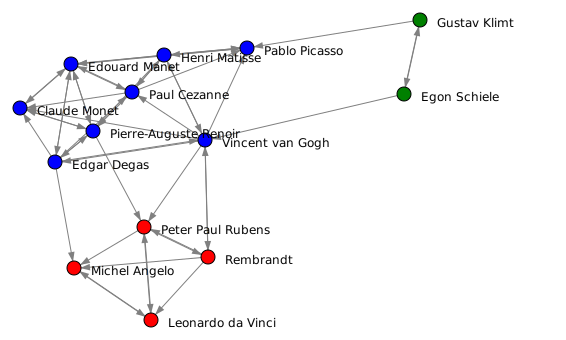

In [29]:
SVG(image)

**Metrics**

In [30]:
dasgupta_score(adjacency, dendrogram)

0.49857142857142855

In [31]:
tree_sampling_divergence(adjacency, dendrogram)

0.48729193280825467

## Bigraphs

In [32]:
graph = movie_actor(metadata=True)
biadjacency = graph.biadjacency
names_row = graph.names_row
names_col = graph.names_col

**Hierarchy**

In [33]:
biward = BiWard(cluster_col = True, cluster_both = True)
biward.fit(biadjacency)

BiWard(embedding_method=GSVD(n_components=10, regularization=None, relative_regularization=True, factor_row=0.5, factor_col=0.5, factor_singular=0.0, normalized=True, solver=LanczosSVD()), cluster_row=True, cluster_col=True, cluster_both=True)

In [34]:
dendrogram_row = biward.dendrogram_row_
dendrogram_col = biward.dendrogram_col_
dendrogram_full = biward.dendrogram_full_

In [35]:
image = svg_dendrogram(dendrogram_row, names_row, n_clusters=4, rotate=True)

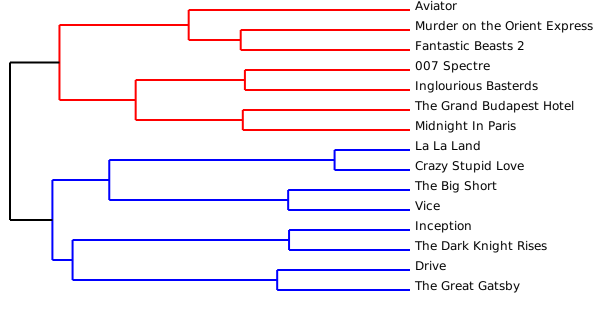

In [36]:
SVG(image)

In [37]:
image = svg_dendrogram(dendrogram_col, names_col, n_clusters=4, rotate=True)

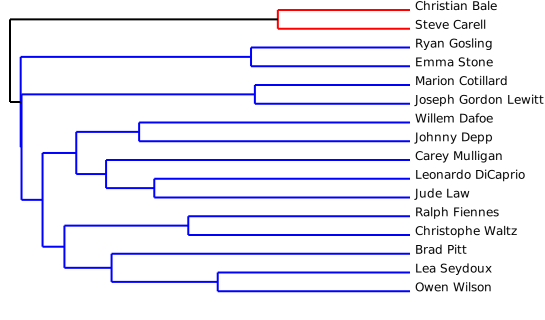

In [38]:
SVG(image)

**Cuts of the dendrogram**

In [39]:
labels = cut_straight(dendrogram_full, n_clusters = 4)
n_row = biadjacency.shape[0]
labels_row = labels[:n_row]
labels_col = labels[n_row:]

In [40]:
image = svg_bigraph(biadjacency, names_row, names_col, labels_row, labels_col)

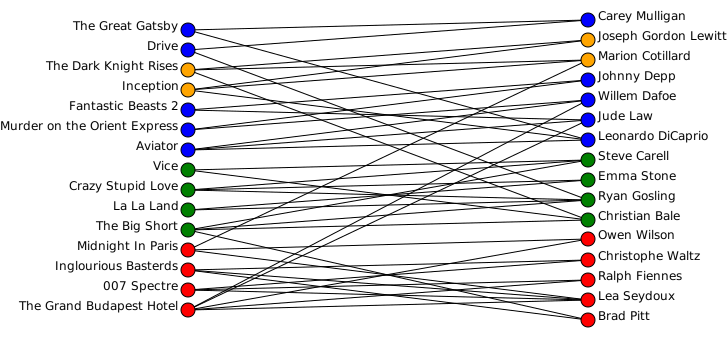

In [41]:
SVG(image)